In [2]:
import pandas as pd # for data manupulation or analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import sklearn.datasets
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import pickle #for dumping the model or we can use joblib library

dataset = sklearn.datasets.load_breast_cancer()

In [4]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [8]:
print("It checks wheather there is any null value present in the dataset or not.",df.isnull().sum())

It checks wheather there is any null value present in the dataset or not. mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [9]:
print(df.duplicated().sum())

0


Heatmap

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -

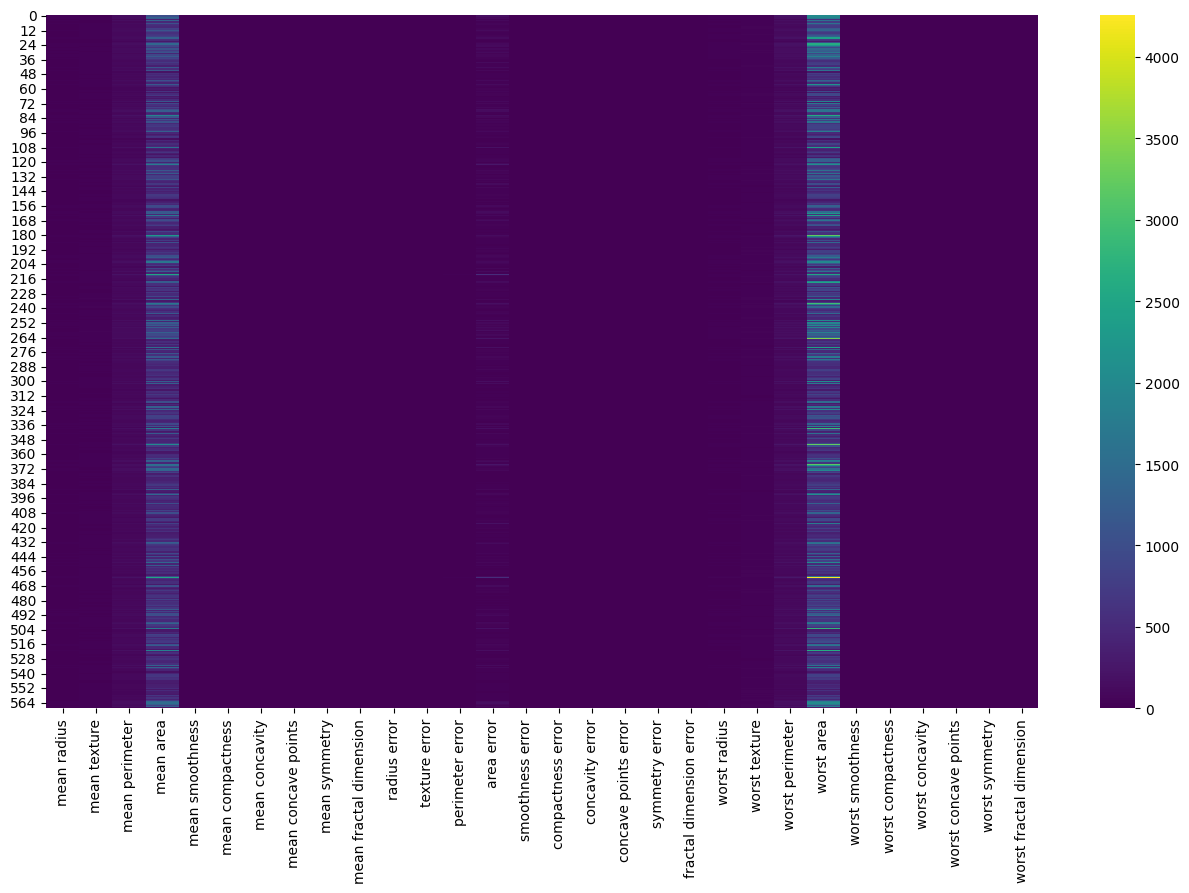

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df,cmap = 'viridis')
print(df.corr())

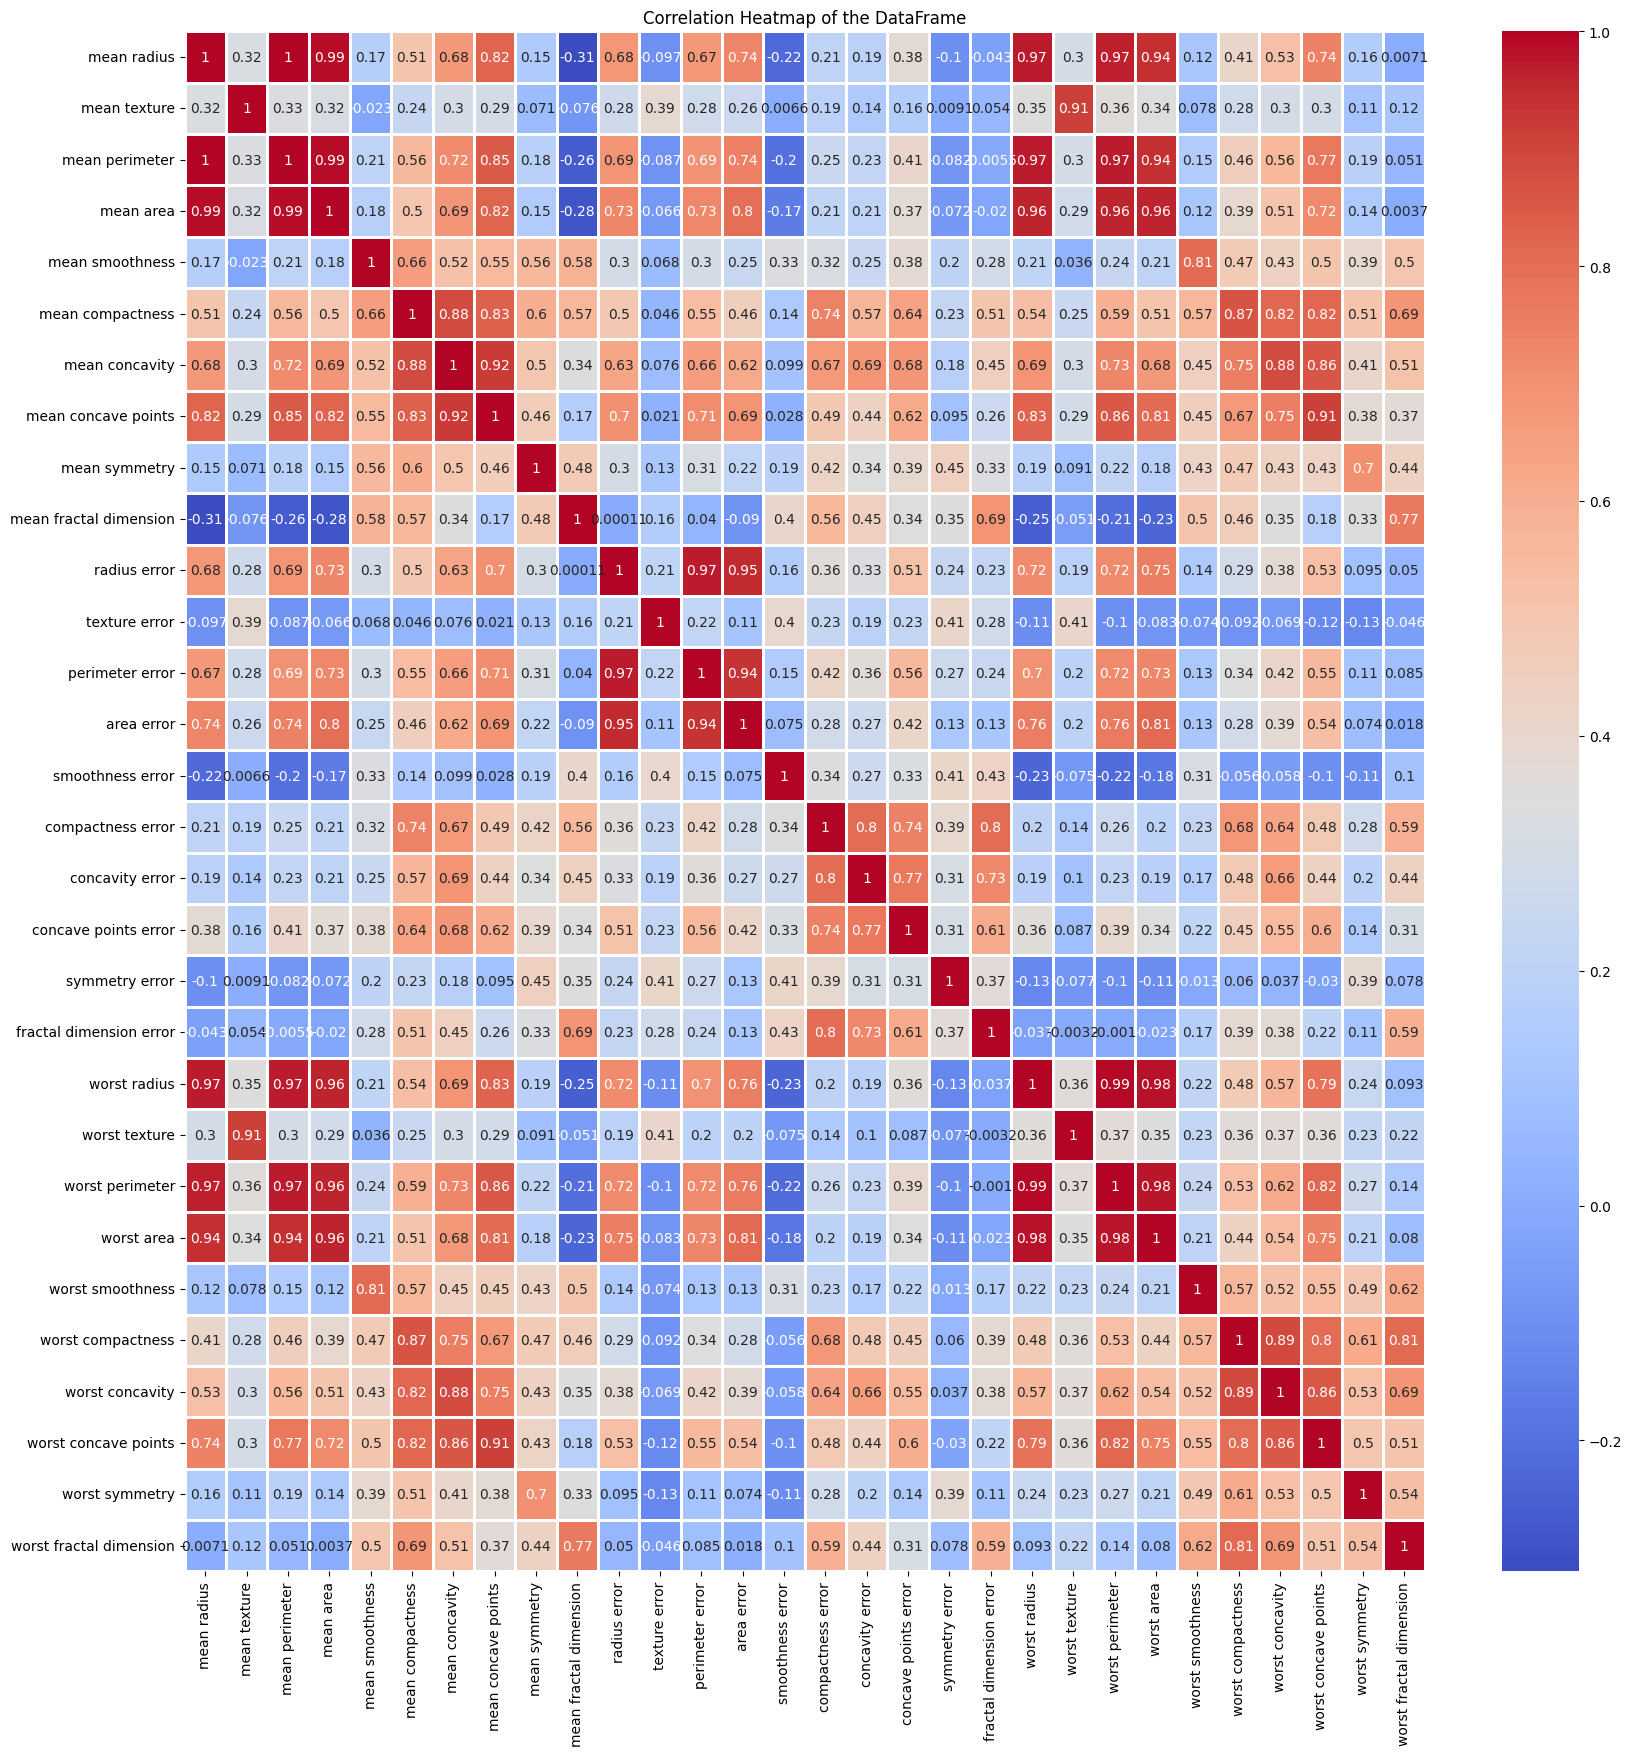

In [11]:
# Set up the first heatmap to visualize correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=2)
plt.title("Correlation Heatmap of the DataFrame")
plt.show()

In [12]:
# Check if the 'target' column exists in the DataFrame
if 'target' in df.columns:
    # Drop the 'target' column to create a new DataFrame
    cancer_df2 = df.drop(columns=['target'])
    print(f"The shape of 'cancer_df2' is: {cancer_df2.shape}")
else:
    print("The 'target' column does not exist in the DataFrame.")

The 'target' column does not exist in the DataFrame.


In [13]:
print(df.shape)

(569, 30)


In [14]:
X = df
Y = dataset.target

In [15]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [16]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Splitting the dataset into two part: Train and Test

In [17]:
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size=0.2, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (114, 30) (455, 30)


Stadardize the data

In [19]:
print(dataset.data.std())

228.29740508276657


In [20]:
Standard_scalar = StandardScaler()

In [21]:
Standard_scalar.fit(X_train)

StandardScaler()

In [22]:
X_train_standardized = Standard_scalar.transform(X_train)

In [23]:
print(X_train_standardized)

[[-0.08700339 -1.47192915 -0.10537391 ... -0.26629174 -1.09776353
  -0.65597459]
 [ 0.19989092  0.03577342  0.1706179  ...  0.44844054  0.06066588
   0.02108157]
 [-1.28858427 -0.21847659 -1.30667757 ... -1.41981535  0.19788632
  -0.31050377]
 ...
 [ 0.67523542  0.61546345  0.70329853 ...  1.36221218  1.000987
   0.62759948]
 [ 0.20832899  1.5866985   0.10942329 ... -1.35965118 -1.95719681
  -1.62740299]
 [ 0.78774299  0.03068842  0.84293725 ...  2.03773974  0.27299646
   0.34822356]]


In [24]:
X_test_standardized = Standard_scalar.transform(X_test)

In [25]:
print(X_test_standardized)

[[-0.05606381  2.08248602 -0.06142879 ... -0.2165319  -0.96776521
  -0.06278674]
 [-0.87736909 -0.59476661 -0.92020689 ... -1.18699961 -0.7756566
  -0.75039587]
 [ 1.38684581  0.89768096  1.42202722 ...  0.77866494  0.39432821
   0.43709065]
 ...
 [-0.50328141 -1.55837415 -0.57685993 ... -1.39267362 -0.92443244
  -0.78094394]
 [-0.53703368 -1.70075416 -0.5723422  ... -0.18335867  0.27444088
  -0.46768744]
 [ 0.90587594  1.45448849  0.95382682 ...  0.79826731 -1.09776353
   0.48096878]]


In [26]:
print(X_train_standardized.std())

1.0


In [28]:
print(X_test_standardized.std())

0.9635120013171872


Machine Learning Model Building

SVM Model

In [29]:
svc_classifier = SVC()
svc_classifier.fit(X_train, Y_train)
Y_Pred_Svc = svc_classifier.predict(X_test)
Accuarcy_svm = accuracy_score(Y_test,Y_Pred_Svc)
print(Accuarcy_svm)

0.9098901098901099


Logistic Regression

In [30]:
# Initialize the Logistic Regression classifier
Lr_classifier = LogisticRegression(random_state=51, penalty='l1', solver='liblinear')
# Fit the model on training data
Lr_classifier.fit(X_train, Y_train)
# Make predictions on the test data
Y_Pred_Lr = Lr_classifier.predict(X_test)
# Calculate the accuracy score
Accuracy_Lr = accuracy_score(Y_test, Y_Pred_Lr)
# Print the accuracy
print(Accuracy_Lr)

0.9406593406593406


C:\Users\pradn\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Decision Tree Classifier

In [31]:
# Initialize the DecisionTreeClassifier
Dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=51)
# Fit the model on training data
Dt_classifier.fit(X_train, Y_train)
# Make predictions on the test data
Y_Pred_Dt = Dt_classifier.predict(X_test)
# Calculate the accuracy score
Accuracy_dt = accuracy_score(Y_test, Y_Pred_Dt)

# Print the accuracy
print(Accuracy_dt)

0.9208791208791208


XGBoost Classifier

In [32]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2],
}

# Initialize the classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV on training data
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, Y_train)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the accuracy
accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)
print(f"Optimized XGBoost Classifier Accuracy: {accuracy_xgb}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\pradn\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pradn\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pradn\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\pradn\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py", line 1512, in fit
   

Best Hyperparameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.5}
Optimized XGBoost Classifier Accuracy: 0.9494505494505494


In [33]:
# Initialize the DecisionTreeClassifier
Dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=51)
# Fit the model on training data
Dt_classifier.fit(X_train, Y_train)
# Make predictions on the test data
Y_Pred_Dt = Dt_classifier.predict(X_test)
# Calculate the accuracy score
Accuracy_dt = accuracy_score(Y_test, Y_Pred_Dt)
# Print the accuracy
print(Accuracy_dt)

0.9208791208791208


In [34]:

# Initialize the XGBClassifier
Xgb_classifier = XGBClassifier()
# Fit the model on training data
Xgb_classifier.fit(X_train, Y_train)
# Make predictions on the test data
Y_Pred_Xgb = Xgb_classifier.predict(X_test)
# Calculate the accuracy score
Accuracy_xgb = accuracy_score(Y_test, Y_Pred_Xgb)
# Print the accuracy
print(Accuracy_xgb)

0.9472527472527472


In [35]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2],
}

# Initialize the classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV on training data
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, Y_train)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the accuracy
accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)
print(f"Optimized XGBoost Classifier Accuracy: {accuracy_xgb}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.5}
Optimized XGBoost Classifier Accuracy: 0.9494505494505494


In [36]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [37]:
lr_model_scores = cross_val_score(Lr_classifier,X, Y, cv = kf)
svc_model_scores = cross_val_score(svc_classifier,X, Y, cv = kf)
dt_model_scores = cross_val_score(Dt_classifier,X, Y, cv = kf)
xgb_model_scores = cross_val_score(Xgb_classifier,X, Y, cv = kf)

C:\Users\pradn\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pradn\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pradn\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pradn\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pradn\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\pradn\AppData\Roaming\Python\Python3

In [38]:
print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("Xgb models' average accuracy:", np.mean(xgb_model_scores))

Logistic regression models' average accuracy: 0.948966165413534
Support Vector Classifier models' average accuracy: 0.9173245614035087
Decision tree models' average accuracy: 0.93671679197995
Xgb models' average accuracy: 0.968295739348371


In [40]:
# Save the model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)
print("Model saved to 'xgb_model.pkl'")

Model saved to 'xgb_model.pkl'
